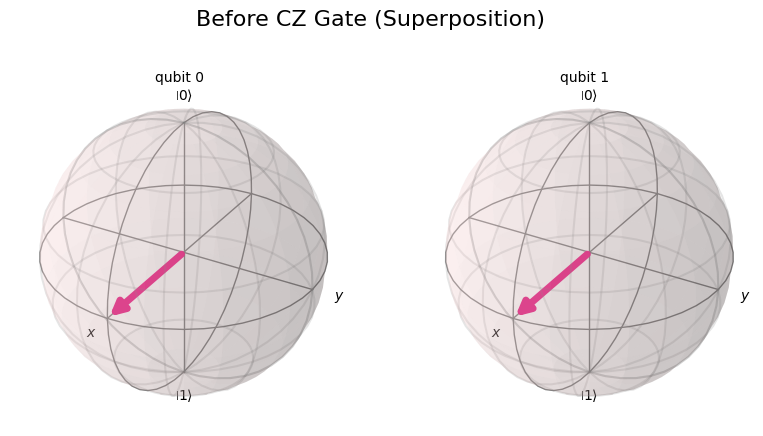

<IPython.core.display.Latex object>

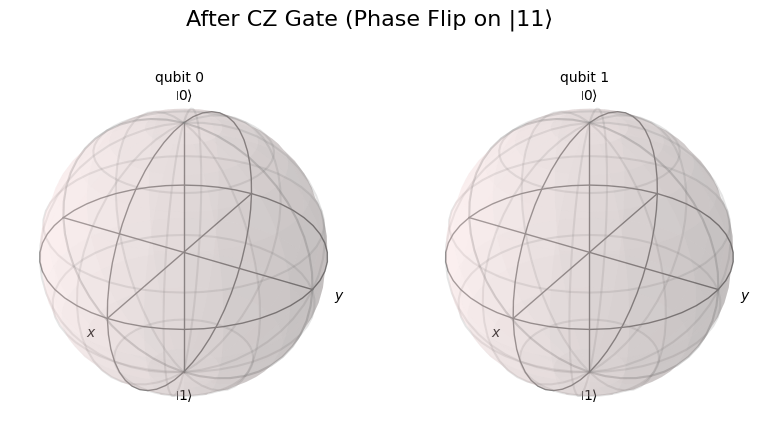

<IPython.core.display.Latex object>

In [2]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from IPython.display import display

# Function to plot Bloch sphere representation
def plot_bloch_states(state, title="Bloch Sphere Representation"):
    display(plot_bloch_multivector(state, title=title))

# Create a 2-qubit quantum circuit
qc = QuantumCircuit(2)

# Step 1: Apply Hadamard gates to create superposition
qc.h(0)
qc.h(1)

# Show initial state before CZ gate
initial_state = Statevector(qc)
plot_bloch_states(initial_state, "Before CZ Gate (Superposition)")
display(initial_state.draw('latex'))  # Before CZ

# Step 2: Apply Controlled-Z gate (CZ)
qc.cz(0, 1)

# Show state after CZ gate
cz_state = Statevector(qc)
plot_bloch_states(cz_state, "After CZ Gate (Phase Flip on |11⟩")  
display(cz_state.draw('latex'))  # After CZ

In [3]:
# Basic example using classic computing
# 5 is in the position 12 of the list (starting from 0)
list = [1, 2, 3, 4, 1, 4, 3, 2, 1, 2, 3, 4, 5, 4, 3, 2, 1]

# Space complexity: O(n)
# We make the logic go the "Oracle"
def oracle(input):
  winner = 5
  if input == winner:
    response = True
  else:
    response = False
  return response

# We iterate over the list and check if the number is the winner with the help of the oracle
for index, trial_number in enumerate(list):
  if oracle(trial_number) is True:
    print(f"{trial_number} is the winner! It is in the position {index} of the list")
    print('%i calls to the Oracle' % (index + 1))
    break

5 is the winner! It is in the position 12 of the list
13 calls to the Oracle


🟢 Step 1: Initialization (Superposition)


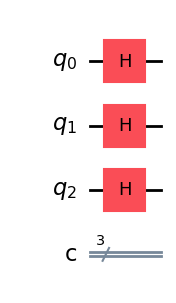

In [4]:
# Grover's Algorithm
# O(sqr(n)) calls to the Oracle

# Import required Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Define the number of qubits (3 qubits: 2 data + 1 ancilla)
n = 3  

### ️1 Initialize the Quantum Circuit
circ = QuantumCircuit(n, n)
# Step 1.1: Superposition - Apply Hadamard gates to all qubits
# This gives us an equal "guess" over all possible states.
circ.h(range(n))
circ.draw(output="mpl")  # Show circuit
print("🟢 Step 1: Initialization (Superposition)")
display(circ.draw("mpl"))  # Display visual circuit

🔵 Step 2: Apply Oracle (Marking the Solution)


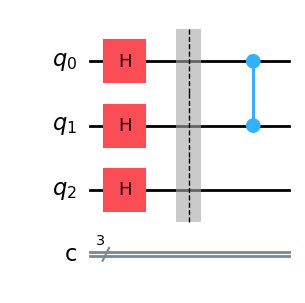

In [5]:

### 2 Define the Oracle (Marks the target state)
def oracle():
    """
    Oracle that marks the |11⟩ state using a phase flip.
    This applies a CZ gate between qubits 0 and 1.
    """
    qc = QuantumCircuit(n)
    qc.cz(1, 0)  # Controlled-Z gate marks |11>
    # Alternative: Use X gates to flip the states |10>
        # qc.x(0)         # Step 1: Flip qubit 0
        # qc.cz(1, 0)     # Step 2: This now flips phase of what WAS |01>, because it's temporarily |11>
        # qc.x(0)         # Step 3: Flip qubit 0 back
    return qc

### 2.1 Apply Oracle
circ.barrier()
circ = circ.compose(oracle())
circ.draw(output="mpl")
print("🔵 Step 2: Apply Oracle (Marking the Solution)")
display(circ.draw("mpl"))


🟠 Step 3: Apply Diffuser (Amplifying the Solution)


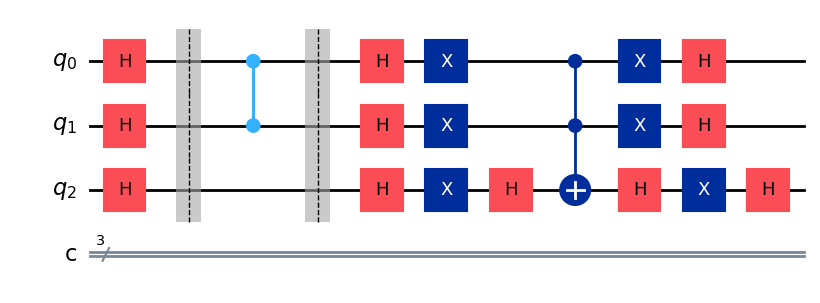

In [6]:
### 3 Define the Diffuser (Inversion about the mean)
def diffuser():
    """
    Grover's diffusion operator:
    - Reflects around the mean to amplify the marked state.
    """
    qc = QuantumCircuit(n)
    qc.h(range(n))   # Apply Hadamard gates
    qc.x(range(n))   # Apply X gates
    qc.h(2)          # Apply Hadamard on ancilla
    qc.ccx(0, 1, 2)  # Apply multi-controlled X (Toffoli)
    qc.h(2)          # Reverse Hadamard
    qc.x(range(n))   # Reverse X gates
    qc.h(range(n))   # Reverse Hadamard
    return qc

### 3.1 Apply Diffuser
circ.barrier()
circ = circ.compose(diffuser())
circ.draw(output="mpl")
print("🟠 Step 3: Apply Diffuser (Amplifying the Solution)")
display(circ.draw("mpl"))


🟣 Step 4: Measurement (Extracting the Solution)


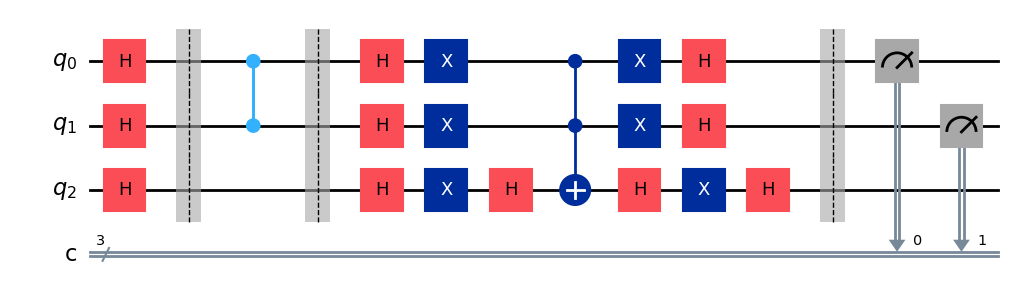

In [7]:
### 4 Measure the Circuit
circ.barrier()
# Measure only the first two qubits (the data qubits)
circ.measure([0,1], [0,1])
# circ.measure_all()
print("🟣 Step 4: Measurement (Extracting the Solution)")
display(circ.draw("mpl"))

📊 Final Measurement Results


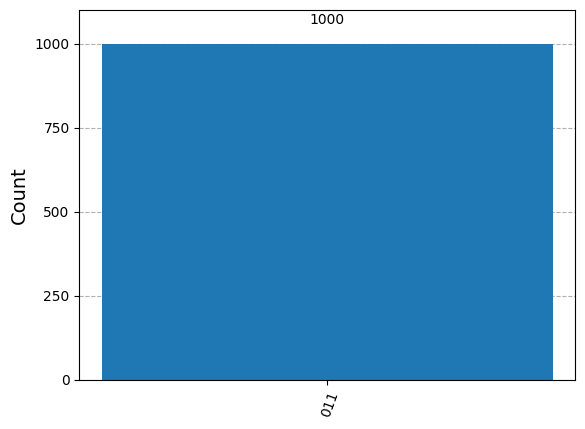

In [ ]:
### 5 Run the Simulation
# Initialize the simulator
simulator = AerSimulator()
# Transpile the circuit
compiled_circuit = transpile(circ, simulator)
# Run the circuit 1000 times
job = simulator.run(compiled_circuit, shots=1000)
# Get results and plot histogram
result = job.result()
counts = result.get_counts()
print("📊 Final Measurement Results")

# This will display the histogram normalized to probabilities.
# Assume counts is your measurement result and shots is the total number of shots (e.g., 1000)
shots = 1000
norm_counts = {state: count/shots for state, count in counts.items()}
display(plot_histogram(norm_counts))
# display(plot_histogram(counts))